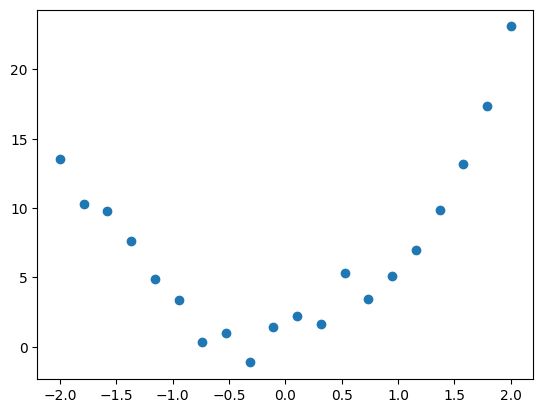

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-2, 2, 20)
y = 4 * x**2 + 2 * x + 1
noise = torch.normal(0, 1.5, size=x.shape)
y += noise
plt.scatter(x, y);

In [ ]:
from ipywidgets import interact

@interact(a=2.0, b=2.0, c=2.0)
def plot(a, b, c):
    y_pred = a * x**2 + b * x + c
    plt.scatter(x, y)
    plt.plot(x, y_pred);

interactive(children=(FloatSlider(value=2.0, description='a', max=6.0, min=-2.0), FloatSlider(value=2.0, descr…